In [33]:
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
df_final=pd.read_csv('df_final.csv')
df_final.head(50)

,question,reponse,url,secteur,source
0,Comment dois-je m’inscrire ?,Les inscriptions ne se font que par internet.V...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
1,"Je suis en classe préparatoire, suis-je obligé...",L'inscription à la voie technologique de la fi...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
2,"Je suis en classe préparatoire ECG, suis-je ob...","Oui, pour une inscription en voie ECG, dans la...",https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
3,Je ne suis pas en possession de mon diplôme du...,Vous pouvez téléverser votre relevé de notes o...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
4,Ma carte nationale d'identité (CNI) ou/et mon ...,La durée de validité de la pièce d’identité fo...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
5,Je n'ai pas effectué ma Journée Défense et Cit...,"Conformément au règlement du concours, vous de...",https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
6,Combien de fois est-il possible de passer un m...,Vous pouvez vous présenter trois fois maximum ...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
7,"Je veux changer mon mot de passe, comment faire ?","Il vous suffit de cliquer sur ""codes perdus ?""...",https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
8,Je veux signer électroniquement (valider) mon ...,"Cliquez sur la rubrique ""Confirmation d’inscri...",https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne
9,Comment m'inscrire au concours d'administrateu...,Pour s'inscrire au concours d'administrateur s...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne


In [26]:
df_final.source.value_counts()

source
Service Public                615
Impots                        141
faq .gouv.fr                   88
expedia                        55
urssaf                         41
Banque centrale Européenne     37
ratp                           31
Louvre                         22
Banque de France               18
College de France              16
Institut Pasteur               14
parcoursup                      9
Name: count, dtype: int64

In [20]:
df_final['secteur'] = df_final['secteur'].replace('Administration', 'Administratif')
df_final['secteur'] = df_final['secteur'].replace('education', 'Scolarité')
df_final['secteur'] = df_final['secteur'].replace('Louvre', 'Culture')


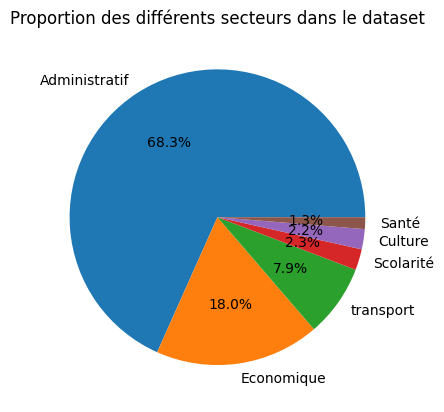

In [22]:

# Count the occurrences of each theme
theme_counts = df_final['secteur'].value_counts()

# Plot the result as a pie chart
theme_counts.plot(kind='pie', autopct='%1.1f%%')

# Add labels and title
plt.title('Proportion des différents secteurs dans le dataset')
plt.ylabel('')

# Display the plot
plt.show()



In [27]:

def calculate_fk_grade_level(file_path):

    # Vérifier si la colonne 'text' existe dans le DataFrame
    if 'text' not in df_final.columns:
        raise ValueError("La colonne 'text' n'existe pas dans le fichier CSV.")

    # Calculer le Flesch-Kincaid Grade Level pour chaque texte
    df_final['flesch_kincaid_grade'] = df_final['text'].apply(textstat.flesch_kincaid_grade)


    return df_final

# Exemple d'utilisation
# Remplacez 'your_dataset.csv' par le chemin vers votre fichier CSV
result = calculate_fk_grade_level('your_dataset.csv')
print(result)


ModuleNotFoundError: No module named 'pkg_resources'

In [44]:
import textstat
import pkg_resources

In [45]:
import pandas as pd

# Charger le DataFrame
df_final = pd.read_csv('df_final.csv')

# Convertir les colonnes 'question' et 'reponse' en minuscules
df_final["question"] = df_final["question"].str.lower()
df_final["reponse"] = df_final["reponse"].str.lower()

# Appliquer strip() pour enlever les espaces vides au début et à la fin de chaque valeur
df_final = df_final.applymap(lambda x: str(x).replace('\n', '').replace('\xa0', '').strip())

# Enregistrer le DataFrame mis à jour dans un nouveau fichier CSV
df_final.to_csv('df_final2.csv', index=False)

df_final2 = pd.read_csv('df_final2.csv')

/var/folders/f9/g81jmwzj4fq1s148c7ts97880000gn/T/ipykernel_13929/811582856.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_final = df_final.applymap(lambda x: str(x).replace('\n', '').replace('\xa0', '').strip())


In [47]:
import pandas as pd
import numpy as np  # Importez numpy pour traiter les valeurs NaN
import textstat

def calculate_fk_grade_level(file_path):
    # Charger le dataset
    df = pd.read_csv(file_path)

    # Vérifier si la colonne 'text' existe dans le DataFrame
    if 'question' not in df.columns:
        raise ValueError("La colonne 'question' n'existe pas dans le fichier CSV.")

    # Remplacer les valeurs NaN par une chaîne vide
    df['question'] = df['question'].fillna('')
    df['reponse'] = df['reponse'].fillna('')

    # Convertir toutes les valeurs de la colonne 'question' en chaînes de caractères
    df['question'] = df['question'].astype(str)
    df['reponse'] = df['reponse'].astype(str)


    # Calculer le Flesch-Kincaid Grade Level pour chaque texte
    df['question_grade'] = df['question'].apply(textstat.flesch_kincaid_grade)
    df['reponse_grade'] = df['reponse'].apply(textstat.flesch_kincaid_grade)


    #df.drop(columns=['Unnamed: 0'], inplace=True)

    # Sauvegarder le DataFrame mis à jour dans un nouveau fichier CSV
    df.to_csv('updated_dataset.csv', index=False)

    return df

# Exemple d'utilisation
# Remplacez 'df_final2.csv' par le chemin vers votre fichier CSV
result = calculate_fk_grade_level('df_final2.csv')
result 

,question,reponse,url,secteur,source,question_grade,reponse_grade
0,comment dois-je m’inscrire ?,les inscriptions ne se font que par internet.v...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne,9.2,8.7
1,"je suis en classe préparatoire, suis-je obligé...",l'inscription à la voie technologique de la fi...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne,10.7,15.0
2,"je suis en classe préparatoire ecg, suis-je ob...","oui, pour une inscription en voie ecg, dans la...",https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne,11.9,27.9
3,je ne suis pas en possession de mon diplôme du...,vous pouvez téléverser votre relevé de notes o...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne,6.4,13.4
4,ma carte nationale d'identité (cni) ou/et mon ...,la durée de validité de la pièce d’identité fo...,https://www.concours-bce.com/la-foire-aux-ques...,Economique,Banque centrale Européenne,6.0,16.6
...,...,...,...,...,...,...,...
1086,quels sont mes droits et mes devoirs lors de l...,vous vous engagez y compris avec un médiateur ...,https://www.louvre.fr/visiter/faq/billets-et-t...,Culture,Louvre,6.4,9.5
1087,qu'est-ce que le droit de parole ?,"le droit de parole, c'est-à-dire le fait de co...",https://www.louvre.fr/visiter/faq/billets-et-t...,Culture,Louvre,0.9,11.5
1088,puis-je visiter l'exposition temporaire revoir...,"afin de préserver le confort de visite, les gr...",https://www.louvre.fr/visiter/faq/billets-et-t...,Culture,Louvre,11.1,8.0
1089,mon groupe comprend une personne en situation ...,du matériel d’aide et de confort (fauteuils ro...,https://www.louvre.fr/visiter/faq/billets-et-t...,Culture,Louvre,7.4,8.9
